# Импорт пакетов

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials
import os
import matplotlib.pyplot as plt
import difflib 
# from slugify import slugify
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pickle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import csv
import librosa

In [65]:
print (np.__version__)

1.19.5


# Обеспечиваю доступ к данным на гугл диске

In [ ]:
drive.flush_and_unmount()
drive.mount("/content/drive")

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# смотрю на список файлов на диске
%cd /content/drive/MyDrive/
!ls -htl | head

/content/drive/MyDrive
ls: 'общая папка с аней к.': No such file or directory
total 6.3M
-rw------- 1 root root 1.1M Apr 23 17:40 KVACH_5_delete_other_from_data.ipynb
-rw------- 1 root root 2.6M Apr 23 17:39 my_random_forest.joblib
-rw------- 1 root root  151 Apr 23 16:56 dataset_20.gsheet
-rw------- 1 root root  151 Apr 23 16:54 DF_3.gsheet
-rw------- 1 root root 248K Apr 23 16:09 DF_4.csv
-rw------- 1 root root 232K Apr 23 15:48 dataset_20.csv
-rw------- 1 root root 251K Apr 23 13:59 DF_3 (1).csv
-rw------- 1 root root  42K Apr 23 13:56 df_with_filenames.csv
-rw------- 1 root root  26K Apr 23 13:56 diff_table_files.csv


# СПИСОК ССЫЛОК НА ИСПОЛЬЗУЕМЫЕ ДАННЫЕ

In [ ]:
# СПИСОК С ЖАНРАМИ - 382 строки - 381 файл - с учетом файлов, что мы добавили для баланса классов
GENRE_data = 'https://docs.google.com/spreadsheets/d/1z72v_iwOQy9VGBOyzCp6hpzE5PHbMHspmO9TAYRl5U0/edit#gid=2114934209'

# ССЫЛКА НА МОЙ ГУГЛ ДИСК, куда я выкачала все файлы из общей папки студентов, что мы добавили для баланса классов
MUSIC_files_data = '/content/drive/MyDrive/Data_for_colab/songs_data/all/new'

# Табличка с жанрами - (df) 

In [ ]:
sht2 = gc.open_by_url(GENRE_data).sheet1
rows = sht2.get_all_values()
headers = rows.pop(0)
df = pd.DataFrame.from_records(rows, columns=headers)
df.song

0                   Нет_мира_без_тебя-Ранетки
1      Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar
2                       Precious-Depeche_Mode
3                     Ultima_Thule-Oxxxymiron
4                                  Unravel-TK
                        ...                  
387                    The_Die_Is_Cast-Enigma
388               Mother_(Feat_Anggun)-Enigma
389           No_Time_For_Caution-Hans_Zimmer
390          Nina_Simone_-_Work_Song_48693142
391                         Passacalia-Hendel
Name: song, Length: 392, dtype: object

In [ ]:
df.tail()

,,student,song,coarse_genre,genre1,genre2,genre3,file_names
387,387,Darya Khaleneva,The_Die_Is_Cast-Enigma,new_age,,,,
388,388,Darya Khaleneva,Mother_(Feat_Anggun)-Enigma,new_age,,,,
389,389,NA,No_Time_For_Caution-Hans_Zimmer,Instrumental,,,,
390,390,NA,Nina_Simone_-_Work_Song_48693142,Country,,,,
391,391,NA,Passacalia-Hendel,Classic,,,,


In [ ]:
# код, который уберет опечатки при заполнении жанров ребятами
df['coarse_genre'] = df['coarse_genre'].replace('pop', 'Pop')
df['coarse_genre'] = df['coarse_genre'].replace('classic', 'Classic')
df['coarse_genre'] = df['coarse_genre'].replace('Classics', 'Classic')
df['coarse_genre'] = df['coarse_genre'].replace('Classical', 'Classic')
df['coarse_genre'] = df['coarse_genre'].replace('country', 'Country')
df['coarse_genre'] = df['coarse_genre'].replace('folk', 'Folk')
df['coarse_genre'] = df['coarse_genre'].replace('Folk ', 'Folk')
df['coarse_genre'] = df['coarse_genre'].replace('Ethnic', 'Folk')
df['coarse_genre'] = df['coarse_genre'].replace('ethnic', 'Folk')
df['coarse_genre'] = df['coarse_genre'].replace('electronica', 'Electronic')
df['coarse_genre'] = df['coarse_genre'].replace('electro', 'Electronic')
df['coarse_genre'] = df['coarse_genre'].replace('Electronica', 'Electronic')
df['coarse_genre'] = df['coarse_genre'].replace('\r\nElectronic', 'Electronic')
df['coarse_genre'] = df['coarse_genre'].replace('rock', 'Rock')
df['coarse_genre'] = df['coarse_genre'].replace('hip-hop', 'Hip-Hop')
df['coarse_genre'] = df['coarse_genre'].replace('Hip-hop', 'Hip-Hop')
df['coarse_genre'] = df['coarse_genre'].replace('Disco', 'Disco ')
df['coarse_genre'] = df['coarse_genre'].replace('indie', 'Indie')
df['coarse_genre'] = df['coarse_genre'].replace('indie_rock', 'Indie_Rock')
df['coarse_genre'] = df['coarse_genre'].replace('indi_rock', 'Indie_Rock')
df['coarse_genre'] = df['coarse_genre'].replace('Indi_rock', 'Indie_Rock')
df['coarse_genre'] = df['coarse_genre'].replace('Indie Rock', 'Indie_Rock')
df['coarse_genre'] = df['coarse_genre'].replace('alt_rock', 'Alternative_Rock')
df['coarse_genre'] = df['coarse_genre'].replace('Alternative rock', 'Alternative_Rock')
df['coarse_genre'] = df['coarse_genre'].replace('Alternative_rock', 'Alternative_Rock')
df['coarse_genre'] = df['coarse_genre'].replace('indi_pop', 'indie_pop')
df['coarse_genre'] = df['coarse_genre'].replace('jazz', 'Jazz')
df['coarse_genre'] = df['coarse_genre'].replace('alternative metal', 'Alternative_Metal')
df['coarse_genre'] = df['coarse_genre'].replace('alternative_metal', 'Alternative_Metal')
df['coarse_genre'] = df['coarse_genre'].replace('Electropop', 'Electro_Pop')
df['coarse_genre'] = df['coarse_genre'].replace('Pop rock', 'Pop_Rock')
df['coarse_genre'] = df['coarse_genre'].replace('Rap rock', 'Rap_Rock')
df['coarse_genre'] = df['coarse_genre'].replace('alternative', 'Alternative')
df['coarse_genre'] = df['coarse_genre'].replace('christian_rock', 'Christian_Rock')
df['coarse_genre'] = df['coarse_genre'].replace('indie_pop', 'Indie_Pop')
df['coarse_genre'] = df['coarse_genre'].replace('rap', 'Rap')
df['coarse_genre'] = df['coarse_genre'].replace('trap', 'Trap')
df['coarse_genre'] = df['coarse_genre'].replace('symphonic_metal', 'Symphonic_Metal')


## Сколько песен каких жанров?

In [ ]:
df[['song','coarse_genre']].groupby("coarse_genre").count().sort_values('song', ascending=False)
# df[['song','coarse_genre']].groupby("coarse_genre").count().sort_values('song', ascending=False).count()

,song
coarse_genre,
Electronic,70
Rock,54
Metal,32
Folk,24
Pop,23
Indie,23
Hip-Hop,22
Indie_Rock,22
Symphonic_Metal,20


In [ ]:
df.tail()

,,student,song,coarse_genre,genre1,genre2,genre3,file_names
387,387,Darya Khaleneva,The_Die_Is_Cast-Enigma,new_age,,,,
388,388,Darya Khaleneva,Mother_(Feat_Anggun)-Enigma,new_age,,,,
389,389,NA,No_Time_For_Caution-Hans_Zimmer,Instrumental,,,,
390,390,NA,Nina_Simone_-_Work_Song_48693142,Country,,,,
391,391,NA,Passacalia-Hendel,Classic,,,,


In [ ]:
df.columns

Index(['', 'student', 'song', 'coarse_genre', 'genre1', 'genre2', 'genre3',
       'file_names'],
      dtype='object')

## Сколько наименований в таблице? - 392

In [ ]:
len(df)

392

In [ ]:
names = df.song.to_list()

## Уменьшение числа жанров - все лишнее в other

In [ ]:
main_genres = df[['song','coarse_genre']].groupby("coarse_genre").count().sort_values('song', ascending=False).index[:10].to_list()
main_genres

['Electronic',
 'Rock',
 'Metal',
 'Folk',
 'Pop',
 'Indie',
 'Hip-Hop',
 'Indie_Rock',
 'Symphonic_Metal',
 'Instrumental']

In [ ]:
df['basic_genre'] = df['song']
df.loc[~df["basic_genre"].isin(main_genres), "basic_genre"] = "Other"

In [ ]:
basic_genre = []

for i in df.coarse_genre:
  if i in main_genres:
    basic_genre.append(i)
  else:
    basic_genre.append('Other')


basic_genre

['Rock',
 'Hip-Hop',
 'Rock',
 'Hip-Hop',
 'Rock',
 'Pop',
 'Other',
 'Hip-Hop',
 'Hip-Hop',
 'Other',
 'Rock',
 'Rock',
 'Indie',
 'Pop',
 'Indie',
 'Rock',
 'Hip-Hop',
 'Rock',
 'Indie',
 'Indie',
 'Other',
 'Rock',
 'Indie',
 'Pop',
 'Indie',
 'Hip-Hop',
 'Rock',
 'Other',
 'Other',
 'Rock',
 'Indie',
 'Indie',
 'Rock',
 'Other',
 'Rock',
 'Pop',
 'Rock',
 'Rock',
 'Indie',
 'Hip-Hop',
 'Pop',
 'Other',
 'Rock',
 'Hip-Hop',
 'Pop',
 'Hip-Hop',
 'Hip-Hop',
 'Rock',
 'Rock',
 'Other',
 'Rock',
 'Hip-Hop',
 'Electronic',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Electronic',
 'Metal',
 'Metal',
 'Electronic',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Folk',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Metal',
 'Other',
 'Other',
 'Instrumental',
 'Instrumental',
 'Rock',
 'Rock',
 'Hip-Hop',
 'Other',
 'Rock',
 'Indie_Roc

In [ ]:
df['basic_genre'] = basic_genre

### Смотрю сколько песен каких жанров ПОСЛЕ уменьшения числа жанров

In [ ]:
# стало
df[['song','basic_genre']].groupby("basic_genre").count().sort_values('song', ascending=False)

,song
basic_genre,
Other,84
Electronic,70
Rock,54
Metal,32
Folk,24
Indie,23
Pop,23
Hip-Hop,22
Indie_Rock,22


In [ ]:
# было
df[['song','coarse_genre']].groupby("coarse_genre").count().sort_values('song', ascending=False)

,song
coarse_genre,
Electronic,70
Rock,54
Metal,32
Folk,24
Pop,23
Indie,23
Hip-Hop,22
Indie_Rock,22
Symphonic_Metal,20


In [ ]:
df.tail(20)

,,student,song,coarse_genre,genre1,genre2,genre3,file_names,basic_genre
372,372,Комарова_Маргарита,Po_Belongs_-_Hans_Zimmer,Instrumental,,,,,Instrumental
373,373,Комарова_Маргарита,Now_We_Are_Free_From_Gladiator_-_Hans_Zimmer,Instrumental,,,,,Instrumental
374,374,Комарова_Маргарита,One_Day_-_Hans_Zimmer,Instrumental,,,,,Instrumental
375,375,Комарова_Маргарита,Symphony_No_5_-_Lyudvig_van_Betkhoven,Instrumental,,,,,Instrumental
376,376,Комарова_Маргарита,Sonata_No_8_-_Lyudvig_van_Betkhoven,Instrumental,,,,,Instrumental
377,377,Комарова_Маргарита,Moonlight_Sonata_-_Lyudvig_van_Betkhoven,Instrumental,,,,,Instrumental
378,378,Комарова_Маргарита,Piano_Sonata_No_-_Ludwig_Van_Beethoven,Instrumental,,,,,Instrumental
379,379,Комарова_Маргарита,Sonata_in_A_Major_Mov_3_-_Wolfgang_Amadeus_Mozart,Instrumental,,,,,Instrumental
380,380,Комарова_Маргарита,Sonata_in_C_Major_Mov_1_-_Wolfgang_Amadeus_Mozart,Instrumental,,,,,Instrumental
381,381,Darya Khaleneva,Amen_(Feat_Aquilo)-Enigma,new_age,,,,,Other


In [ ]:
# удаляю доп. жанры
df = df.drop(['student', 'genre1', 'genre2', 'genre3', ''], axis=1)

In [ ]:
df.head()

,song,coarse_genre,file_names,basic_genre
0,Нет_мира_без_тебя-Ранетки,Rock,Нет_мира_без_тебя-Ранетки,Rock
1,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar,Hip-Hop,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar,Hip-Hop
2,Precious-Depeche_Mode,Rock,Precious-Depeche_Mode,Rock
3,Ultima_Thule-Oxxxymiron,Hip-Hop,Ultima_Thule-Oxxxymiron,Hip-Hop
4,Unravel-TK,Rock,Unravel-TK,Rock


# Добавляю к жанровой табличке имена файлов из папки - (df_with_filenames)

In [ ]:
files = [ os.path.splitext(f)[0] for f in os.listdir(MUSIC_files_data)]

In [ ]:
files

['Morning_-_Iron_Wine',
 'Saturday_Sun_-_Nick_Drake',
 'Stressed_Out_-_Twenty_One_Pilots',
 'Hay_Loft_-_Mother_Mother',
 'Man_in_Black_-_Johnny_Cash',
 'Flightless_Bird_American_Mouth_-_Iron_Wine',
 'Knockin_on_Heavens_Door_-_Bob_Dylan',
 'Safe_And_Sound_-_Capital_Cities',
 'Youre_Somebody_Else_-_Flora_Cash',
 'What_A_Wonderful_World_-_Louis_Armstrong',
 'Not_Strong_Enough_-_Apocalyptica',
 'Old_Yellow_Bricks_-_Arctic_Monkeys',
 'Jingle_Bells_-_Frank_Sinatra',
 'Fire_-_Two_Feet',
 'Dont_Start_Now_-_Dua_Lipa',
 'Natural_-_Imagine_Dragons',
 'Way_Down_We_Go_-_Kaleo',
 'Time_After_Time_-_Miles_Davis',
 'Unstoppable_-_Sia',
 'Dance_Monkey_-_Tones_and_I',
 'Chicago_-_Frank_Sinatra',
 'Pumped_Up_Kicks_-_Foster_The_People_Mark_Foster',
 'Ring_of_Fire_-_Johnny_Cash',
 'The_Adults_Are_Talking_-_The_Strokes',
 'The_Reckoning_-_Within_Temptation',
 'Pink_Moon_-_Nick_Drake',
 'Elephant_Gun_-_Beirut',
 'Umbrella_-_Rihanna',
 'Feeling_Good_-_Nina_Simone',
 'All_of_Me_-_Frank_Sinatra_Charles_Aznavour

In [ ]:
len(files)

392

In [ ]:
!ls /content/drive/MyDrive/Data_for_colab/songs_data/all/new | wc -l

392


In [ ]:
diff = [ difflib.get_close_matches(x, names) for x in files]
diff.count([])

5

In [ ]:
diff = [ difflib.get_close_matches(x, files) for x in names]
diff.count([])

5

In [ ]:
diff_d = {x:difflib.get_close_matches(x, names, n=1) for x in files}
df_diff = pd.DataFrame.from_dict(diff_d, orient="index", columns=['song'])
df_diff.reset_index(inplace=True)
df_diff = df_diff.rename(columns = {'index':'file_names'})
df_diff['diff'] = df_diff['file_names'].ne(df_diff['song'])
names_alone = [ x for x in names if x not in df_diff[df_diff['song'].notna()].song.to_list()]
dirty_diff = {x:difflib.get_close_matches(x, names_alone, n=1,  cutoff=0.3 ) for x in df_diff[df_diff['song'].isna()].file_names.to_list()}
dirty_diff['Tycho-Awake'] = ['Japan - Tycho, Saint Sinner, Satin Jackets']
df_diff_dirty = pd.DataFrame.from_dict(dirty_diff, orient="index", columns=['song'])
df_diff_dirty.reset_index(inplace=True)
df_diff_dirty = df_diff_dirty.rename(columns = {'index':'file_names'})
df_diff = df_diff.dropna(axis='rows')
df_diff_dirty = df_diff_dirty.dropna(axis='rows')
df_diff = df_diff.drop(columns=['diff'])
df_diff = pd.concat([df_diff, df_diff_dirty])
df_diff.to_csv('diff_table_files.csv')
df_diff

,file_names,song
0,Morning_-_Iron_Wine,Morning_-_Iron_Wine
1,Saturday_Sun_-_Nick_Drake,Saturday_Sun_-_Nick_Drake
2,Stressed_Out_-_Twenty_One_Pilots,Stressed_Out_-_Twenty_One_Pilots
3,Hay_Loft_-_Mother_Mother,Hay_Loft_-_Mother_Mother
4,Man_in_Black_-_Johnny_Cash,Man_in_Black_-_Johnny_Cash
...,...,...
0,Tycho-Awake,"Japan - Tycho, Saint Sinner, Satin Jackets"
1,The_Sound_Of_Silence-Simon_and_Garfunkel,The Sound of Silence -
2,Japan-Tycho,Awake - Tycho
3,Habibi—Tamino,Tamino-Habibi


In [ ]:
df_diff.head(50)

,file_names,song
0,Morning_-_Iron_Wine,Morning_-_Iron_Wine
1,Saturday_Sun_-_Nick_Drake,Saturday_Sun_-_Nick_Drake
2,Stressed_Out_-_Twenty_One_Pilots,Stressed_Out_-_Twenty_One_Pilots
3,Hay_Loft_-_Mother_Mother,Hay_Loft_-_Mother_Mother
4,Man_in_Black_-_Johnny_Cash,Man_in_Black_-_Johnny_Cash
5,Flightless_Bird_American_Mouth_-_Iron_Wine,Flightless_Bird_American_Mouth_-_Iron_Wine
6,Knockin_on_Heavens_Door_-_Bob_Dylan,Knockin_on_Heavens_Door_-_Bob_Dylan
7,Safe_And_Sound_-_Capital_Cities,Safe_And_Sound_-_Capital_Cities
8,Youre_Somebody_Else_-_Flora_Cash,Youre_Somebody_Else_-_Flora_Cash
9,What_A_Wonderful_World_-_Louis_Armstrong,What_A_Wonderful_World_-_Louis_Armstrong


In [ ]:
df_with_filenames = pd.merge(df, df_diff, on='song')
df_with_filenames.to_csv('df_with_filenames.csv')
df_with_filenames.head(20)

,song,coarse_genre,file_names_x,basic_genre,file_names_y
0,Нет_мира_без_тебя-Ранетки,Rock,Нет_мира_без_тебя-Ранетки,Rock,Нет_мира_без_тебя-Ранетки
1,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar,Hip-Hop,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar,Hip-Hop,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar
2,Precious-Depeche_Mode,Rock,Precious-Depeche_Mode,Rock,Precious-Depeche_Mode
3,Ultima_Thule-Oxxxymiron,Hip-Hop,Ultima_Thule-Oxxxymiron,Hip-Hop,Ultima_Thule-Oxxxymiron
4,Unravel-TK,Rock,Unravel-TK,Rock,Unravel-TK
5,Тихий_огонек_моей_души_remix-Високосный_Год,Pop,Тихий_огонек_моей_души_remix-Високосный_Год,Pop,Тихий_огонек_моей_души_remix-Високосный_Год
6,Orange-Seven_Oops,J-Pop,Orange-Seven_Oops,Other,Orange-Seven_Oops
7,sad-XXXTENTACION,Hip-Hop,sad-XXXTENTACION,Hip-Hop,sad-XXXTENTACION
8,Неваляшка-Oxxxymiron,Hip-Hop,Неваляшка_Oxxxymiron,Hip-Hop,Неваляшка_Oxxxymiron
9,Я_говорю_тебе_да-Зоя_Ященко_и_группа_Белая_Гва...,Art_Song,Я_говорю_тебе_да-Зоя_Ященко_и_группа_Белая_Гва...,Other,Я_говорю_тебе_да-Зоя_Ященко_и_группа_Белая_Гва...


# Добавляю фичи (feature_table <-- dataset_20.csv)

In [ ]:
header = 'file_names oenv tempogram chroma_stft spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
 
TABLE = 'dataset_20.csv'
 
 
file = open(TABLE, 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [ ]:
MUSIC_files_data

'/content/drive/MyDrive/Data_for_colab/songs_data/all/new'

In [ ]:
d = {}
sr = 1000
 
files = [f for f in os.listdir(MUSIC_files_data)]

In [ ]:
files

['Morning_-_Iron_Wine.mp3',
 'Saturday_Sun_-_Nick_Drake.mp3',
 'Stressed_Out_-_Twenty_One_Pilots.mp3',
 'Hay_Loft_-_Mother_Mother.mp3',
 'Man_in_Black_-_Johnny_Cash.mp3',
 'Flightless_Bird_American_Mouth_-_Iron_Wine.mp3',
 'Knockin_on_Heavens_Door_-_Bob_Dylan.mp3',
 'Safe_And_Sound_-_Capital_Cities.mp3',
 'Youre_Somebody_Else_-_Flora_Cash.mp3',
 'What_A_Wonderful_World_-_Louis_Armstrong.mp3',
 'Not_Strong_Enough_-_Apocalyptica.mp3',
 'Old_Yellow_Bricks_-_Arctic_Monkeys.mp3',
 'Jingle_Bells_-_Frank_Sinatra.mp3',
 'Fire_-_Two_Feet.mp3',
 'Dont_Start_Now_-_Dua_Lipa.mp3',
 'Natural_-_Imagine_Dragons.mp3',
 'Way_Down_We_Go_-_Kaleo.mp3',
 'Time_After_Time_-_Miles_Davis.mp3',
 'Unstoppable_-_Sia.mp3',
 'Dance_Monkey_-_Tones_and_I.mp3',
 'Chicago_-_Frank_Sinatra.mp3',
 'Pumped_Up_Kicks_-_Foster_The_People_Mark_Foster.mp3',
 'Ring_of_Fire_-_Johnny_Cash.mp3',
 'The_Adults_Are_Talking_-_The_Strokes.mp3',
 'The_Reckoning_-_Within_Temptation.mp3',
 'Pink_Moon_-_Nick_Drake.mp3',
 'Elephant_Gun_-_Bei

In [ ]:

 
 
for f in files:
    y, sr = librosa.load(f'/content/drive/MyDrive/Data_for_colab/songs_data/all/new/{f}')
    oenv = librosa.onset.onset_strength(y=y, sr=sr)
    tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{str(f)}; {np.median(oenv)}; {np.median(tempogram)}; {np.median(chroma_stft)}; {np.median(spec_cent)}; {np.median(spec_bw)}; {np.median(rolloff)}; {np.median(zcr)}; {np.median(mfcc)}'
    for e in mfcc:
        to_append += f' ; {np.mean(e)}'
    # to_append += f' {g}'
    file = open(TABLE, 'a', newline='')
    with file:
      writer = csv.writer(file)
      writer.writerow(to_append.split(';'))

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [ ]:
# TABLE = 'dataset_20.csv'
feature_table = pd.read_csv('/content/drive/MyDrive/' + TABLE)



In [ ]:
feature_table.head()

,file_names,oenv,tempogram,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,Morning_-_Iron_Wine.mp3,0.702614,0.090650,0.280474,1155.944150,1321.440540,2196.386719,0.056641,-10.198773,-125.471977,157.833115,-51.854694,28.969673,-4.913922,5.627323,-0.737434,-10.624533,-10.855657,-1.558116,-15.686015,-14.881224,-11.754500,-16.242979,-11.534008,-11.457787,-21.600105,-6.618913,-14.398519,-7.753073
1,Saturday_Sun_-_Nick_Drake.mp3,0.601913,0.064511,0.160824,852.344814,1571.120765,1162.792969,0.034180,-1.232988,-269.068176,151.153000,37.221687,22.154316,7.029340,15.230578,-4.874825,-4.550663,-4.353325,-5.919343,-6.030477,1.400521,-4.561316,-6.214271,-3.484822,2.091824,-11.674581,-1.097736,-6.618474,-1.784029
2,Stressed_Out_-_Twenty_One_Pilots.mp3,0.862669,0.054905,0.335998,2591.990174,2855.896423,6395.361328,0.081543,3.001684,-66.623894,77.745018,23.010405,24.673004,6.163441,9.112531,4.362879,6.599479,-0.898462,10.160904,-5.266137,5.656095,-3.512351,2.612657,-1.606536,2.352590,-2.078825,5.117765,-6.292673,0.469436
3,Hay_Loft_-_Mother_Mother.mp3,0.818429,0.077823,0.368587,2667.843635,2508.161180,5297.167969,0.129395,2.413372,5.582916,73.211876,-17.430395,36.929043,4.367239,8.816821,2.866832,8.012944,4.821280,5.936984,-5.909447,-0.036947,-4.044590,4.312269,-1.927506,1.491539,-7.898817,-0.293944,-1.464225,3.662237
4,Man_in_Black_-_Johnny_Cash.mp3,0.936730,0.077650,0.269011,1668.601605,2018.762511,3229.980469,0.069824,-0.082982,-103.889297,124.296349,-15.009079,26.316683,13.056523,-4.835501,3.323793,-0.605050,-12.422919,4.496647,-3.385122,-0.755696,-4.916160,4.488213,-2.506485,6.278708,-4.589941,-1.487786,-3.377125,0.682770


# Сливаю таблицу фичей с информацией о жанрах (DF_3.csv)

In [ ]:
df_with_filenames.head()

,song,coarse_genre,file_names_x,basic_genre,file_names_y
0,Нет_мира_без_тебя-Ранетки,Rock,Нет_мира_без_тебя-Ранетки,Rock,Нет_мира_без_тебя-Ранетки
1,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar,Hip-Hop,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar,Hip-Hop,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar
2,Precious-Depeche_Mode,Rock,Precious-Depeche_Mode,Rock,Precious-Depeche_Mode
3,Ultima_Thule-Oxxxymiron,Hip-Hop,Ultima_Thule-Oxxxymiron,Hip-Hop,Ultima_Thule-Oxxxymiron
4,Unravel-TK,Rock,Unravel-TK,Rock,Unravel-TK


In [ ]:
feature_table.head()

,file_names,oenv,tempogram,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,Morning_-_Iron_Wine.mp3,0.702614,0.090650,0.280474,1155.944150,1321.440540,2196.386719,0.056641,-10.198773,-125.471977,157.833115,-51.854694,28.969673,-4.913922,5.627323,-0.737434,-10.624533,-10.855657,-1.558116,-15.686015,-14.881224,-11.754500,-16.242979,-11.534008,-11.457787,-21.600105,-6.618913,-14.398519,-7.753073
1,Saturday_Sun_-_Nick_Drake.mp3,0.601913,0.064511,0.160824,852.344814,1571.120765,1162.792969,0.034180,-1.232988,-269.068176,151.153000,37.221687,22.154316,7.029340,15.230578,-4.874825,-4.550663,-4.353325,-5.919343,-6.030477,1.400521,-4.561316,-6.214271,-3.484822,2.091824,-11.674581,-1.097736,-6.618474,-1.784029
2,Stressed_Out_-_Twenty_One_Pilots.mp3,0.862669,0.054905,0.335998,2591.990174,2855.896423,6395.361328,0.081543,3.001684,-66.623894,77.745018,23.010405,24.673004,6.163441,9.112531,4.362879,6.599479,-0.898462,10.160904,-5.266137,5.656095,-3.512351,2.612657,-1.606536,2.352590,-2.078825,5.117765,-6.292673,0.469436
3,Hay_Loft_-_Mother_Mother.mp3,0.818429,0.077823,0.368587,2667.843635,2508.161180,5297.167969,0.129395,2.413372,5.582916,73.211876,-17.430395,36.929043,4.367239,8.816821,2.866832,8.012944,4.821280,5.936984,-5.909447,-0.036947,-4.044590,4.312269,-1.927506,1.491539,-7.898817,-0.293944,-1.464225,3.662237
4,Man_in_Black_-_Johnny_Cash.mp3,0.936730,0.077650,0.269011,1668.601605,2018.762511,3229.980469,0.069824,-0.082982,-103.889297,124.296349,-15.009079,26.316683,13.056523,-4.835501,3.323793,-0.605050,-12.422919,4.496647,-3.385122,-0.755696,-4.916160,4.488213,-2.506485,6.278708,-4.589941,-1.487786,-3.377125,0.682770


In [ ]:
file_name = []

for j in feature_table.file_names:
  file_name.append(j[:j.find('.')])

file_name

['Morning_-_Iron_Wine',
 'Saturday_Sun_-_Nick_Drake',
 'Stressed_Out_-_Twenty_One_Pilots',
 'Hay_Loft_-_Mother_Mother',
 'Man_in_Black_-_Johnny_Cash',
 'Flightless_Bird_American_Mouth_-_Iron_Wine',
 'Knockin_on_Heavens_Door_-_Bob_Dylan',
 'Safe_And_Sound_-_Capital_Cities',
 'Youre_Somebody_Else_-_Flora_Cash',
 'What_A_Wonderful_World_-_Louis_Armstrong',
 'Not_Strong_Enough_-_Apocalyptica',
 'Old_Yellow_Bricks_-_Arctic_Monkeys',
 'Jingle_Bells_-_Frank_Sinatra',
 'Fire_-_Two_Feet',
 'Dont_Start_Now_-_Dua_Lipa',
 'Natural_-_Imagine_Dragons',
 'Way_Down_We_Go_-_Kaleo',
 'Time_After_Time_-_Miles_Davis',
 'Unstoppable_-_Sia',
 'Dance_Monkey_-_Tones_and_I',
 'Chicago_-_Frank_Sinatra',
 'Pumped_Up_Kicks_-_Foster_The_People_Mark_Foster',
 'Ring_of_Fire_-_Johnny_Cash',
 'The_Adults_Are_Talking_-_The_Strokes',
 'The_Reckoning_-_Within_Temptation',
 'Pink_Moon_-_Nick_Drake',
 'Elephant_Gun_-_Beirut',
 'Umbrella_-_Rihanna',
 'Feeling_Good_-_Nina_Simone',
 'All_of_Me_-_Frank_Sinatra_Charles_Aznavour

In [ ]:
feature_table['file_names_y'] = file_name

In [ ]:
feature_table.head()

,file_names,oenv,tempogram,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,file_names_y
0,Morning_-_Iron_Wine.mp3,0.702614,0.090650,0.280474,1155.944150,1321.440540,2196.386719,0.056641,-10.198773,-125.471977,157.833115,-51.854694,28.969673,-4.913922,5.627323,-0.737434,-10.624533,-10.855657,-1.558116,-15.686015,-14.881224,-11.754500,-16.242979,-11.534008,-11.457787,-21.600105,-6.618913,-14.398519,-7.753073,Morning_-_Iron_Wine
1,Saturday_Sun_-_Nick_Drake.mp3,0.601913,0.064511,0.160824,852.344814,1571.120765,1162.792969,0.034180,-1.232988,-269.068176,151.153000,37.221687,22.154316,7.029340,15.230578,-4.874825,-4.550663,-4.353325,-5.919343,-6.030477,1.400521,-4.561316,-6.214271,-3.484822,2.091824,-11.674581,-1.097736,-6.618474,-1.784029,Saturday_Sun_-_Nick_Drake
2,Stressed_Out_-_Twenty_One_Pilots.mp3,0.862669,0.054905,0.335998,2591.990174,2855.896423,6395.361328,0.081543,3.001684,-66.623894,77.745018,23.010405,24.673004,6.163441,9.112531,4.362879,6.599479,-0.898462,10.160904,-5.266137,5.656095,-3.512351,2.612657,-1.606536,2.352590,-2.078825,5.117765,-6.292673,0.469436,Stressed_Out_-_Twenty_One_Pilots
3,Hay_Loft_-_Mother_Mother.mp3,0.818429,0.077823,0.368587,2667.843635,2508.161180,5297.167969,0.129395,2.413372,5.582916,73.211876,-17.430395,36.929043,4.367239,8.816821,2.866832,8.012944,4.821280,5.936984,-5.909447,-0.036947,-4.044590,4.312269,-1.927506,1.491539,-7.898817,-0.293944,-1.464225,3.662237,Hay_Loft_-_Mother_Mother
4,Man_in_Black_-_Johnny_Cash.mp3,0.936730,0.077650,0.269011,1668.601605,2018.762511,3229.980469,0.069824,-0.082982,-103.889297,124.296349,-15.009079,26.316683,13.056523,-4.835501,3.323793,-0.605050,-12.422919,4.496647,-3.385122,-0.755696,-4.916160,4.488213,-2.506485,6.278708,-4.589941,-1.487786,-3.377125,0.682770,Man_in_Black_-_Johnny_Cash


In [ ]:
feature_table.head()

,file_names,oenv,tempogram,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,file_names_y
0,Morning_-_Iron_Wine.mp3,0.702614,0.090650,0.280474,1155.944150,1321.440540,2196.386719,0.056641,-10.198773,-125.471977,157.833115,-51.854694,28.969673,-4.913922,5.627323,-0.737434,-10.624533,-10.855657,-1.558116,-15.686015,-14.881224,-11.754500,-16.242979,-11.534008,-11.457787,-21.600105,-6.618913,-14.398519,-7.753073,Morning_-_Iron_Wine
1,Saturday_Sun_-_Nick_Drake.mp3,0.601913,0.064511,0.160824,852.344814,1571.120765,1162.792969,0.034180,-1.232988,-269.068176,151.153000,37.221687,22.154316,7.029340,15.230578,-4.874825,-4.550663,-4.353325,-5.919343,-6.030477,1.400521,-4.561316,-6.214271,-3.484822,2.091824,-11.674581,-1.097736,-6.618474,-1.784029,Saturday_Sun_-_Nick_Drake
2,Stressed_Out_-_Twenty_One_Pilots.mp3,0.862669,0.054905,0.335998,2591.990174,2855.896423,6395.361328,0.081543,3.001684,-66.623894,77.745018,23.010405,24.673004,6.163441,9.112531,4.362879,6.599479,-0.898462,10.160904,-5.266137,5.656095,-3.512351,2.612657,-1.606536,2.352590,-2.078825,5.117765,-6.292673,0.469436,Stressed_Out_-_Twenty_One_Pilots
3,Hay_Loft_-_Mother_Mother.mp3,0.818429,0.077823,0.368587,2667.843635,2508.161180,5297.167969,0.129395,2.413372,5.582916,73.211876,-17.430395,36.929043,4.367239,8.816821,2.866832,8.012944,4.821280,5.936984,-5.909447,-0.036947,-4.044590,4.312269,-1.927506,1.491539,-7.898817,-0.293944,-1.464225,3.662237,Hay_Loft_-_Mother_Mother
4,Man_in_Black_-_Johnny_Cash.mp3,0.936730,0.077650,0.269011,1668.601605,2018.762511,3229.980469,0.069824,-0.082982,-103.889297,124.296349,-15.009079,26.316683,13.056523,-4.835501,3.323793,-0.605050,-12.422919,4.496647,-3.385122,-0.755696,-4.916160,4.488213,-2.506485,6.278708,-4.589941,-1.487786,-3.377125,0.682770,Man_in_Black_-_Johnny_Cash


In [ ]:
df_with_filenames.head()

,song,coarse_genre,file_names_x,basic_genre,file_names_y
0,Нет_мира_без_тебя-Ранетки,Rock,Нет_мира_без_тебя-Ранетки,Rock,Нет_мира_без_тебя-Ранетки
1,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar,Hip-Hop,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar,Hip-Hop,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar
2,Precious-Depeche_Mode,Rock,Precious-Depeche_Mode,Rock,Precious-Depeche_Mode
3,Ultima_Thule-Oxxxymiron,Hip-Hop,Ultima_Thule-Oxxxymiron,Hip-Hop,Ultima_Thule-Oxxxymiron
4,Unravel-TK,Rock,Unravel-TK,Rock,Unravel-TK


In [ ]:
DF = pd.merge(df_with_filenames, feature_table, on='file_names_y')

In [ ]:
# DF.to_csv('DF_3.csv')

In [ ]:
DF.tail(5)

,song,coarse_genre,file_names_x,basic_genre,file_names_y,file_names,oenv,tempogram,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
382,The_Die_Is_Cast-Enigma,new_age,,Other,The_Die_Is_Cast-Enigma,The_Die_Is_Cast-Enigma.mp3,0.835027,0.118778,0.397322,1275.145629,1782.802014,2616.284180,0.042480,4.247884,-151.949646,129.456467,2.829925,20.847532,12.268910,5.278893,2.915963,7.666700,2.991714,10.842566,3.407631,3.764100,0.615706,5.378942,1.500031,3.689950,-0.688160,1.085858,-1.415801,5.174788
383,Mother_(Feat_Anggun)-Enigma,new_age,,Other,Mother_(Feat_Anggun)-Enigma,Mother_(Feat_Anggun)-Enigma.mp3,0.771562,0.095978,0.268368,1285.766067,2075.095986,2487.084961,0.040039,0.718422,-207.079208,121.063255,23.078573,24.879089,18.279703,4.256137,-2.174133,0.955130,1.329094,-1.760415,-6.302883,-3.091269,-4.474914,1.411920,1.522501,2.270238,-1.644785,-0.517405,-4.197276,-1.874594
384,No_Time_For_Caution-Hans_Zimmer,Instrumental,,Instrumental,No_Time_For_Caution-Hans_Zimmer,No_Time_For_Caution-Hans_Zimmer.mp3,0.715653,0.094342,0.191915,1081.596009,1402.836941,2196.386719,0.054688,1.615529,-183.331085,150.335541,-12.595343,30.765547,3.713098,6.648391,0.646867,9.638678,-0.797915,0.509352,0.944558,1.481381,-0.631612,5.563344,3.828137,6.253268,0.533288,-1.459254,-5.893121,1.263632
385,Nina_Simone_-_Work_Song_48693142,Country,,Other,Nina_Simone_-_Work_Song_48693142,Nina_Simone_-_Work_Song_48693142.mp3,0.943977,0.088488,0.244169,2220.132418,1902.367644,4166.674805,0.116699,-2.380197,-84.188515,90.419830,-39.928940,53.609619,-15.377982,9.635806,-15.301550,4.449908,-8.137101,-0.896332,-10.717238,6.987889,-5.593837,0.323508,-4.533013,4.382908,-6.090047,0.841726,-2.872059,-3.978861
386,Passacalia-Hendel,Classic,,Other,Passacalia-Hendel,Passacalia-Hendel.mp3,0.474740,0.064983,0.142200,921.844489,1024.991061,1658.056641,0.051270,-7.489891,-252.139908,175.472275,-29.120441,19.310431,-5.342658,-4.637713,-9.340707,-14.043821,-11.660896,-11.347286,-10.604239,-10.809023,-8.310258,-6.560931,-6.678500,-2.461747,-0.421368,-4.646341,-6.163891,-5.521690


## УДАЛЯЮ СТРОКИ С МИНОРНЫМИ ЖАНРАМИ! 

In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/DF_3.csv')

In [ ]:
DF.tail(5)

,Unnamed: 0,song,coarse_genre,file_names_x,basic_genre,file_names_y,file_names,oenv,tempogram,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
382,382,The_Die_Is_Cast-Enigma,new_age,NaN,Other,The_Die_Is_Cast-Enigma,The_Die_Is_Cast-Enigma.mp3,0.835027,0.118778,0.397322,1275.145629,1782.802014,2616.284180,0.042480,4.247884,-151.949646,129.456467,2.829925,20.847532,12.268910,5.278893,2.915963,7.666700,2.991714,10.842566,3.407631,3.764100,0.615706,5.378942,1.500031,3.689950,-0.688160,1.085858,-1.415801,5.174788
383,383,Mother_(Feat_Anggun)-Enigma,new_age,NaN,Other,Mother_(Feat_Anggun)-Enigma,Mother_(Feat_Anggun)-Enigma.mp3,0.771562,0.095978,0.268368,1285.766067,2075.095986,2487.084961,0.040039,0.718422,-207.079208,121.063255,23.078573,24.879089,18.279703,4.256137,-2.174133,0.955130,1.329094,-1.760415,-6.302883,-3.091269,-4.474914,1.411920,1.522501,2.270238,-1.644785,-0.517405,-4.197276,-1.874594
384,384,No_Time_For_Caution-Hans_Zimmer,Instrumental,NaN,Instrumental,No_Time_For_Caution-Hans_Zimmer,No_Time_For_Caution-Hans_Zimmer.mp3,0.715653,0.094342,0.191915,1081.596009,1402.836941,2196.386719,0.054688,1.615529,-183.331085,150.335541,-12.595343,30.765547,3.713098,6.648391,0.646867,9.638678,-0.797915,0.509352,0.944558,1.481381,-0.631612,5.563344,3.828137,6.253268,0.533288,-1.459254,-5.893121,1.263632
385,385,Nina_Simone_-_Work_Song_48693142,Country,NaN,Other,Nina_Simone_-_Work_Song_48693142,Nina_Simone_-_Work_Song_48693142.mp3,0.943977,0.088488,0.244169,2220.132418,1902.367644,4166.674805,0.116699,-2.380197,-84.188515,90.419830,-39.928940,53.609619,-15.377982,9.635806,-15.301550,4.449908,-8.137101,-0.896332,-10.717238,6.987889,-5.593837,0.323508,-4.533013,4.382908,-6.090047,0.841726,-2.872059,-3.978861
386,386,Passacalia-Hendel,Classic,NaN,Other,Passacalia-Hendel,Passacalia-Hendel.mp3,0.474740,0.064983,0.142200,921.844489,1024.991061,1658.056641,0.051270,-7.489891,-252.139908,175.472275,-29.120441,19.310431,-5.342658,-4.637713,-9.340707,-14.043821,-11.660896,-11.347286,-10.604239,-10.809023,-8.310258,-6.560931,-6.678500,-2.461747,-0.421368,-4.646341,-6.163891,-5.521690


In [ ]:
DF[['song','coarse_genre']].groupby("coarse_genre").count().sort_values('song', ascending=False)

,song
coarse_genre,
Electronic,66
Rock,54
Metal,31
Folk,26
Indie_Rock,24
Indie,23
Pop,23
Hip-Hop,22
Symphonic_Metal,20


In [ ]:
indexNames = DF[ (DF['basic_genre'] == 'Other')].index

In [ ]:
len(indexNames)

80

In [ ]:
DF.drop(indexNames , inplace=True)

In [ ]:
DF.tail()

,Unnamed: 0,song,coarse_genre,file_names_x,basic_genre,file_names_y,file_names,oenv,tempogram,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
372,372,Moonlight_Sonata_-_Lyudvig_van_Betkhoven,Instrumental,NaN,Instrumental,Moonlight_Sonata_-_Lyudvig_van_Betkhoven,Moonlight_Sonata_-_Lyudvig_van_Betkhoven.mp3,0.273337,0.030779,0.102429,563.834940,707.775126,882.861328,0.035156,-2.964294,-281.643677,175.821823,26.568153,12.711557,5.396289,1.807764,2.004008,-7.836216,-11.355100,-6.859588,-7.235590,-10.201758,-6.018995,-1.354102,-3.701099,-3.975816,-1.555341,-2.468585,-3.212633,-1.119303
373,373,Piano_Sonata_No_-_Ludwig_Van_Beethoven,Instrumental,NaN,Instrumental,Piano_Sonata_No_-_Ludwig_Van_Beethoven,Piano_Sonata_No_-_Ludwig_Van_Beethoven.mp3,0.429432,0.057829,0.139970,729.612052,786.829298,1130.493164,0.048340,-2.138686,-411.042877,165.802185,11.213206,1.444047,1.083324,-5.827728,-5.541817,-4.818184,-4.575325,-2.573785,-2.035610,-3.326273,-3.414688,0.124407,1.994446,0.065404,-1.165400,-1.044075,-0.808627,-2.099591
374,374,Sonata_in_A_Major_Mov_3_-_Wolfgang_Amadeus_Mozart,Instrumental,NaN,Instrumental,Sonata_in_A_Major_Mov_3_-_Wolfgang_Amadeus_Mozart,Sonata_in_A_Major_Mov_3_-_Wolfgang_Amadeus_Moz...,0.475025,0.050270,0.115025,1165.057503,1301.846696,1991.821289,0.067871,-6.531230,-203.677505,154.411163,-27.917879,12.586944,-16.170221,2.234798,-1.126504,-5.194706,-8.406464,-8.253986,-9.608116,-8.821347,-8.659098,1.018436,-3.264767,-7.105627,-7.225165,-7.712545,-4.680709,-1.993272
375,375,Sonata_in_C_Major_Mov_1_-_Wolfgang_Amadeus_Mozart,Instrumental,NaN,Instrumental,Sonata_in_C_Major_Mov_1_-_Wolfgang_Amadeus_Mozart,Sonata_in_C_Major_Mov_1_-_Wolfgang_Amadeus_Moz...,0.572635,0.061057,0.078020,954.346889,1065.387051,1496.557617,0.056641,-3.557742,-222.093857,168.760956,-12.350955,12.502328,-13.225612,-4.054533,-2.300299,-5.056298,-8.438904,-8.464495,-4.198426,-3.873957,-3.624953,0.524945,-0.200421,-2.527156,-2.851791,-3.632407,-0.040243,3.438491
384,384,No_Time_For_Caution-Hans_Zimmer,Instrumental,NaN,Instrumental,No_Time_For_Caution-Hans_Zimmer,No_Time_For_Caution-Hans_Zimmer.mp3,0.715653,0.094342,0.191915,1081.596009,1402.836941,2196.386719,0.054688,1.615529,-183.331085,150.335541,-12.595343,30.765547,3.713098,6.648391,0.646867,9.638678,-0.797915,0.509352,0.944558,1.481381,-0.631612,5.563344,3.828137,6.253268,0.533288,-1.459254,-5.893121,1.263632


In [ ]:
len(DF)

307

In [ ]:
DF[['song','coarse_genre']].groupby("coarse_genre").count().sort_values('song', ascending=False)

,song
coarse_genre,
Electronic,66
Rock,54
Metal,31
Folk,26
Indie_Rock,24
Indie,23
Pop,23
Hip-Hop,22
Symphonic_Metal,20


In [ ]:
DF.tail()

,Unnamed: 0,song,coarse_genre,file_names_x,basic_genre,file_names_y,file_names,oenv,tempogram,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
372,372,Moonlight_Sonata_-_Lyudvig_van_Betkhoven,Instrumental,NaN,Instrumental,Moonlight_Sonata_-_Lyudvig_van_Betkhoven,Moonlight_Sonata_-_Lyudvig_van_Betkhoven.mp3,0.273337,0.030779,0.102429,563.834940,707.775126,882.861328,0.035156,-2.964294,-281.643677,175.821823,26.568153,12.711557,5.396289,1.807764,2.004008,-7.836216,-11.355100,-6.859588,-7.235590,-10.201758,-6.018995,-1.354102,-3.701099,-3.975816,-1.555341,-2.468585,-3.212633,-1.119303
373,373,Piano_Sonata_No_-_Ludwig_Van_Beethoven,Instrumental,NaN,Instrumental,Piano_Sonata_No_-_Ludwig_Van_Beethoven,Piano_Sonata_No_-_Ludwig_Van_Beethoven.mp3,0.429432,0.057829,0.139970,729.612052,786.829298,1130.493164,0.048340,-2.138686,-411.042877,165.802185,11.213206,1.444047,1.083324,-5.827728,-5.541817,-4.818184,-4.575325,-2.573785,-2.035610,-3.326273,-3.414688,0.124407,1.994446,0.065404,-1.165400,-1.044075,-0.808627,-2.099591
374,374,Sonata_in_A_Major_Mov_3_-_Wolfgang_Amadeus_Mozart,Instrumental,NaN,Instrumental,Sonata_in_A_Major_Mov_3_-_Wolfgang_Amadeus_Mozart,Sonata_in_A_Major_Mov_3_-_Wolfgang_Amadeus_Moz...,0.475025,0.050270,0.115025,1165.057503,1301.846696,1991.821289,0.067871,-6.531230,-203.677505,154.411163,-27.917879,12.586944,-16.170221,2.234798,-1.126504,-5.194706,-8.406464,-8.253986,-9.608116,-8.821347,-8.659098,1.018436,-3.264767,-7.105627,-7.225165,-7.712545,-4.680709,-1.993272
375,375,Sonata_in_C_Major_Mov_1_-_Wolfgang_Amadeus_Mozart,Instrumental,NaN,Instrumental,Sonata_in_C_Major_Mov_1_-_Wolfgang_Amadeus_Mozart,Sonata_in_C_Major_Mov_1_-_Wolfgang_Amadeus_Moz...,0.572635,0.061057,0.078020,954.346889,1065.387051,1496.557617,0.056641,-3.557742,-222.093857,168.760956,-12.350955,12.502328,-13.225612,-4.054533,-2.300299,-5.056298,-8.438904,-8.464495,-4.198426,-3.873957,-3.624953,0.524945,-0.200421,-2.527156,-2.851791,-3.632407,-0.040243,3.438491
384,384,No_Time_For_Caution-Hans_Zimmer,Instrumental,NaN,Instrumental,No_Time_For_Caution-Hans_Zimmer,No_Time_For_Caution-Hans_Zimmer.mp3,0.715653,0.094342,0.191915,1081.596009,1402.836941,2196.386719,0.054688,1.615529,-183.331085,150.335541,-12.595343,30.765547,3.713098,6.648391,0.646867,9.638678,-0.797915,0.509352,0.944558,1.481381,-0.631612,5.563344,3.828137,6.253268,0.533288,-1.459254,-5.893121,1.263632


# Обучение рандомного леса

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
DF.head()

,Unnamed: 0,song,coarse_genre,file_names_x,basic_genre,file_names_y,file_names,oenv,tempogram,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0,Нет_мира_без_тебя-Ранетки,Rock,Нет_мира_без_тебя-Ранетки,Rock,Нет_мира_без_тебя-Ранетки,Нет_мира_без_тебя-Ранетки.mp3,0.864231,0.070974,0.364612,2508.769098,2670.908789,5297.167969,0.080078,4.765786,-81.541809,72.410400,10.697836,40.080078,9.645279,8.341401,10.420622,7.731567,6.941633,6.240650,-3.021658,9.360256,0.389831,5.094509,-1.903866,1.351470,-1.112771,5.379741,0.759655,4.560689
1,1,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar,Hip-Hop,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar,Hip-Hop,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar.mp3,0.916046,0.084911,0.434416,2306.977434,2570.336094,5383.300781,0.086426,2.438514,-120.186668,80.196144,-1.612105,13.608697,7.128062,3.796093,-8.295479,8.283918,-5.583026,4.047178,-2.909742,4.878204,-0.582999,3.504226,-0.447747,5.716603,-0.841475,5.718365,1.013091,5.022115
2,2,Precious-Depeche_Mode,Rock,Precious-Depeche_Mode,Rock,Precious-Depeche_Mode,Precious-Depeche_Mode.mp3,0.646538,0.054830,0.286474,2183.673024,2606.734028,5081.835938,0.082520,1.860988,-24.943081,99.339546,4.344289,23.345982,12.680559,9.760518,-0.740349,1.680695,-4.358822,1.610012,-0.174592,2.962272,-2.777680,2.453824,-5.566382,2.234114,-5.637615,2.159448,-2.094748,3.908836
3,3,Ultima_Thule-Oxxxymiron,Hip-Hop,Ultima_Thule-Oxxxymiron,Hip-Hop,Ultima_Thule-Oxxxymiron,Ultima_Thule-Oxxxymiron.mp3,1.023853,0.085814,0.202207,2053.364651,2180.785292,4349.707031,0.087891,-1.767162,-54.367477,92.453674,-10.061056,29.060041,-15.102206,8.294643,-6.175893,7.537271,-3.343945,-4.808682,-10.665324,-4.887922,-4.626473,-3.039616,-0.017022,5.652565,-7.018421,-1.623185,-4.490085,-1.087462
4,4,Unravel-TK,Rock,Unravel-TK,Rock,Unravel-TK,Unravel-TK.mp3,0.903270,0.100959,0.329564,2654.197036,2515.620845,5566.333008,0.127930,1.338889,-2.701325,80.374954,-10.762656,28.862263,-3.252317,8.052688,-4.482811,8.437147,-3.108128,4.838986,-6.998008,0.120453,-2.246089,2.092482,0.554172,6.686165,-1.547104,3.581930,-4.797639,-1.676517


## Разделяю данные на фичи песен (X) и классы (y) 

In [ ]:
X = DF.drop(['Unnamed: 0', 'song', 'coarse_genre', 'basic_genre', 'file_names',  'file_names_y', 'file_names_x'], axis=1)
y = DF.basic_genre

In [ ]:
X.head(20)

,oenv,tempogram,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.864231,0.070974,0.364612,2508.769098,2670.908789,5297.167969,0.080078,4.765786,-81.541809,72.410400,10.697836,40.080078,9.645279,8.341401,10.420622,7.731567,6.941633,6.240650,-3.021658,9.360256,0.389831,5.094509,-1.903866,1.351470,-1.112771,5.379741,0.759655,4.560689
1,0.916046,0.084911,0.434416,2306.977434,2570.336094,5383.300781,0.086426,2.438514,-120.186668,80.196144,-1.612105,13.608697,7.128062,3.796093,-8.295479,8.283918,-5.583026,4.047178,-2.909742,4.878204,-0.582999,3.504226,-0.447747,5.716603,-0.841475,5.718365,1.013091,5.022115
2,0.646538,0.054830,0.286474,2183.673024,2606.734028,5081.835938,0.082520,1.860988,-24.943081,99.339546,4.344289,23.345982,12.680559,9.760518,-0.740349,1.680695,-4.358822,1.610012,-0.174592,2.962272,-2.777680,2.453824,-5.566382,2.234114,-5.637615,2.159448,-2.094748,3.908836
3,1.023853,0.085814,0.202207,2053.364651,2180.785292,4349.707031,0.087891,-1.767162,-54.367477,92.453674,-10.061056,29.060041,-15.102206,8.294643,-6.175893,7.537271,-3.343945,-4.808682,-10.665324,-4.887922,-4.626473,-3.039616,-0.017022,5.652565,-7.018421,-1.623185,-4.490085,-1.087462
4,0.903270,0.100959,0.329564,2654.197036,2515.620845,5566.333008,0.127930,1.338889,-2.701325,80.374954,-10.762656,28.862263,-3.252317,8.052688,-4.482811,8.437147,-3.108128,4.838986,-6.998008,0.120453,-2.246089,2.092482,0.554172,6.686165,-1.547104,3.581930,-4.797639,-1.676517
5,0.870139,0.073742,0.228213,2179.517774,2544.023808,5124.902344,0.082031,-0.191045,-97.932236,90.963737,7.321401,7.543285,-6.600945,-1.090086,-8.706169,2.585974,-6.920285,4.614781,-2.339836,2.091970,-3.041863,-0.354504,-2.981301,0.875184,-5.019658,1.098478,-1.249843,2.282953
7,0.667882,0.040711,0.390437,1488.543125,2027.332455,3240.747070,0.055664,1.619080,-156.398895,103.165741,16.983130,24.712444,8.466610,10.997309,3.154694,8.269309,-3.674897,7.218372,-8.222110,-0.596378,-3.265182,1.311318,-5.560981,-1.823497,-4.692443,1.768855,-1.853152,-0.877001
8,1.134570,0.101546,0.412777,2709.790637,2836.841426,6330.761719,0.097168,3.112940,-24.373293,70.521301,0.922590,17.534124,-0.195398,9.169493,-1.944297,4.885597,-5.485182,5.529612,-1.895552,3.671033,-1.541481,3.445745,-0.022124,4.994440,-2.440290,5.329355,-1.503047,2.801446
10,0.822424,0.086527,0.308799,2173.792899,2403.094147,4629.638672,0.102539,1.226672,-98.760818,94.081398,-2.855294,24.203463,3.247430,8.266638,1.479543,7.789456,-2.039537,4.202917,-0.517891,0.311696,-6.892759,-1.481682,-3.846831,2.429152,-2.171187,6.499305,-1.289430,-2.050731
11,0.828636,0.097888,0.389259,2788.465817,2509.536027,5598.632812,0.131348,1.545293,-18.690857,69.028122,-11.579486,43.451023,6.762032,10.668456,2.364171,14.641260,-2.363420,9.693712,-5.317529,4.270600,-0.911049,-0.798459,-7.921666,0.757222,-9.007945,0.479876,-4.619147,1.624148


In [ ]:
y.head(20)

0        Rock
1     Hip-Hop
2        Rock
3     Hip-Hop
4        Rock
5         Pop
7     Hip-Hop
8     Hip-Hop
10       Rock
11       Rock
12      Indie
13        Pop
14      Indie
15       Rock
16    Hip-Hop
17       Rock
18      Indie
19      Indie
21       Rock
22      Indie
Name: basic_genre, dtype: object

## Разделяю на треин и тест

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)

In [ ]:
len(X_train)

205

## График корреляций между фичами

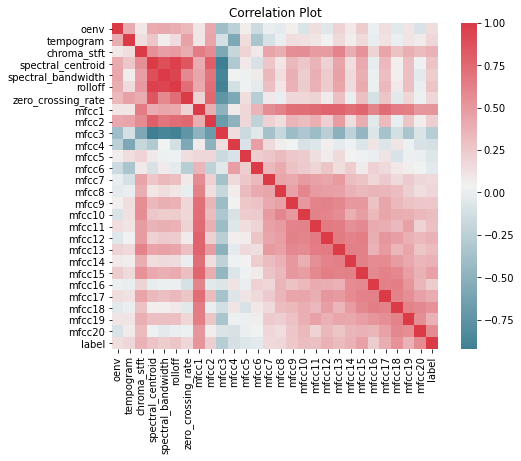

In [ ]:
# График корреляций между фичами
corr_df=X_train
cor= corr_df.corr(method='pearson')

fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

## Сажаю лес и подбираю параметры

In [ ]:
rf = RandomForestClassifier(random_state=8)

In [ ]:
params = {
    "n_estimators": range(100, 200, 10),
    'max_depth' : range(1, 20, 2),
    'min_samples_leaf' : range(1, 8),
    'min_samples_split': range(2, 11, 2)}

params

{'max_depth': range(1, 20, 2),
 'min_samples_leaf': range(1, 8),
 'min_samples_split': range(2, 11, 2),
 'n_estimators': range(100, 200, 10)}

In [ ]:
search = GridSearchCV(rf, params, cv=3, verbose = 2)
search

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=8,
                                   

In [ ]:
search.fit(X_train, y_train)

Fitting 3 folds for each of 3500 candidates, totalling 10500 fits
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Выходные данные были обрезаны до нескольких последних строк (5000).
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=160 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=160, total=   0.3s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=170 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=170, total=   0.3s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=170 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=170, total=   0.3s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=170 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=170, total=   0.3s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=180 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=180, total=   0.3s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=180 

[Parallel(n_jobs=1)]: Done 10500 out of 10500 | elapsed: 45.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=8,
                                   

In [ ]:
best_param = search.best_params_
best_param

'''{'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 120}'''

"{'max_depth': 11,\n 'min_samples_leaf': 2,\n 'min_samples_split': 2,\n 'n_estimators': 120}"

In [ ]:
fi = search.best_estimator_
fi

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [ ]:
imp = pd.DataFrame(fi.feature_importances_, index=X_train.columns, columns=['importance'])
print(imp.sort_values('importance', ascending=False))

                    importance
chroma_stft           0.075350
tempogram             0.060405
mfcc2                 0.055918
oenv                  0.051317
mfcc10                0.048403
mfcc5                 0.042222
zero_crossing_rate    0.041435
spectral_centroid     0.040539
mfcc4                 0.037994
mfcc18                0.036147
spectral_bandwidth    0.035638
mfcc3                 0.033145
label                 0.032587
mfcc7                 0.032326
rolloff               0.031343
mfcc1                 0.030710
mfcc11                0.029813
mfcc20                0.028844
mfcc12                0.027912
mfcc16                0.027784
mfcc9                 0.027571
mfcc13                0.027148
mfcc8                 0.025889
mfcc15                0.025640
mfcc6                 0.024513
mfcc17                0.024460
mfcc19                0.022992
mfcc14                0.021957


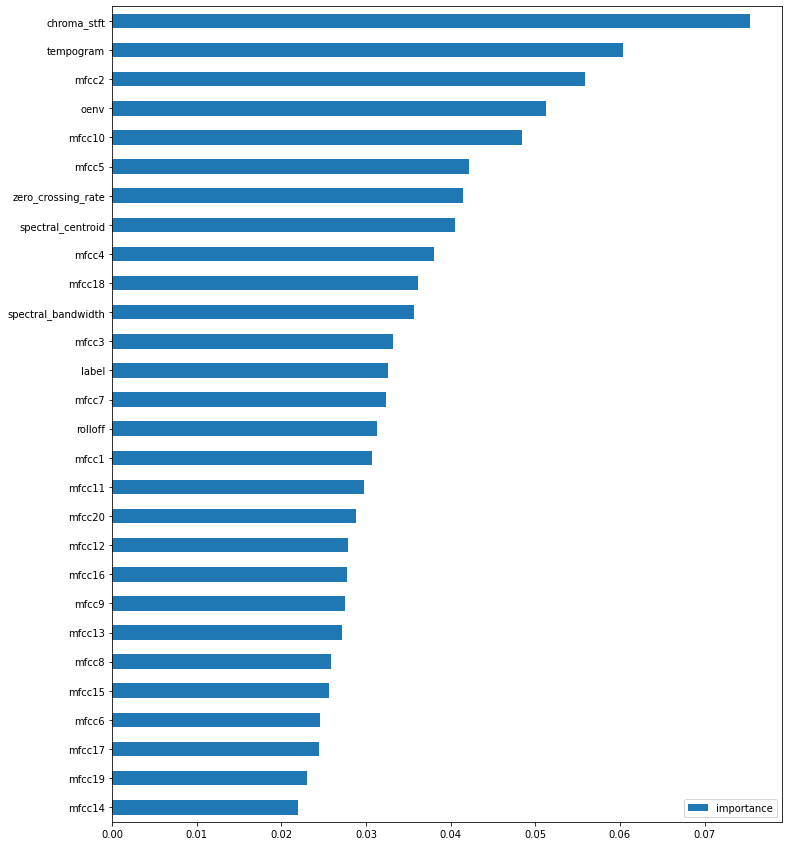

In [ ]:
imp.sort_values('importance').plot(kind='barh', figsize=(12, 15))

In [ ]:
hh = search.predict(X_test)
from sklearn import metrics

In [ ]:
X_train.shape

(205, 28)

In [ ]:
X_test.shape

(102, 28)

In [ ]:
y_test.shape

(102,)

In [ ]:
X_train.shape

(205, 28)

In [ ]:
print(metrics.classification_report(hh, y_test))

                 precision    recall  f1-score   support

     Electronic       0.71      0.63      0.67        27
           Folk       0.11      0.25      0.15         4
        Hip-Hop       0.29      0.67      0.40         3
          Indie       0.00      0.00      0.00         1
     Indie_Rock       0.40      0.29      0.33         7
   Instrumental       0.56      1.00      0.71         5
          Metal       0.92      0.86      0.89        14
            Pop       0.12      0.50      0.20         2
           Rock       0.67      0.25      0.36        32
Symphonic_Metal       0.71      0.71      0.71         7

       accuracy                           0.52       102
      macro avg       0.45      0.52      0.44       102
   weighted avg       0.64      0.52      0.54       102



In [ ]:
pd.Series(hh).value_counts()

Rock               32
Electronic         27
Metal              14
Indie_Rock          7
Symphonic_Metal     7
Instrumental        5
Folk                4
Hip-Hop             3
Pop                 2
Indie               1
dtype: int64

In [ ]:
import joblib
# You can use joblib to save and load the Random Forest from scikit-learn (in fact, any model from scikit-learn)

In [ ]:
joblib.dump(search, "my_random_forest.joblib")

['my_random_forest.joblib']